In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from datetime import date, time, datetime
from operator import attrgetter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D


In [6]:
!pip install squarify

In [7]:
import squarify

In [8]:
customer_csv_path = 'customers_sample.csv'
merchant_codes_xls_path = 'merchant codes list.xls'
transactional_csv_path = 'transactional_data.csv'

customer_df = pd.read_csv(customer_csv_path,
                 sep=";",
                 skiprows=0,
             engine='python')

customer_df = customer_df.set_index('uid1')
customer_df = customer_df[(customer_df.customer_age < 80) & (customer_df.customer_age >= 18)]

transactional_df = pd.read_csv(transactional_csv_path,
                 sep=",",
                 skiprows=0,
             engine='python')

transactional_df = transactional_df[transactional_df.transaction_amt > 100]

merchant_codes_df = pd.read_excel(merchant_codes_xls_path)

data = transactional_df.join(customer_df, on='uid1').dropna()
data['date_pur'] = pd.to_datetime(data['date_pur'], format="%Y-%m-%d", errors='coerce')
data['registration_dt'] = pd.to_datetime(data['registration_dt'], format="%d.%m.%Y", errors='coerce')

In [9]:
merchant_codes_df

,STANDARD MERCHANT CATEGORY CODES\n**Please do not sort this spreadsheet**,Unnamed: 1,Unnamed: 2
0,MCC CODE,Program Type:,NaN
1,0742,Veterinary Services,NaN
2,0763,Agricultural Cooperatives,NaN
3,0780,Landscaping and Horticultural Services,NaN
4,1520,General Contractor/Residential Building,NaN
...,...,...,...
877,9751,"U.K. Supermarkets, Electronic Hot File",NaN
878,9752,"U.K. Petrol Stations, Electronic Hot File",NaN
879,9753,Consumer Electronics/Furniture Store,NaN
880,9754,"Quasi Cash - Gambling-Horse Racing, Dog Racing...",NaN


In [10]:
data.sort_values(by=['date_pur'], ascending=False)

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty,customer_age,country,city_of_living,registration_dt,website_last_visit_date,email,has_mob_app,phone_number,push
1967278,2636986,2021-10-12,5941,3378.00,1,27.0,RUSSIA,Voronezh,2016-05-19,17.11.2018,0.0,1.0,1.0,0.0
2305933,42451010,2021-10-12,5499,160.00,2,63.0,RUSSIA,Samara,2015-07-30,16.11.2020,0.0,0.0,1.0,0.0
1836846,10840492,2021-10-12,5814,800.00,1,27.0,RUSSIA,Ufa,2021-03-03,11.06.2021,0.0,0.0,1.0,0.0
4662350,49303924,2021-10-12,5399,339.00,1,31.0,RUSSIA,Samara,2020-06-23,29.09.2021,0.0,1.0,1.0,1.0
4547831,13763328,2021-10-12,5411,1919.68,3,19.0,RUSSIA,Novokuznetsk,2021-07-23,07.09.2021,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4579781,28530579,2020-01-01,8999,500.00,1,21.0,RUSSIA,Odintsovo,2018-07-10,15.05.2020,0.0,1.0,1.0,1.0
1487446,30889531,2020-01-01,4814,200.00,1,55.0,RUSSIA,Obninsk,2017-10-11,05.01.2018,0.0,0.0,1.0,0.0
1830612,176218,2020-01-01,5993,330.00,1,39.0,RUSSIA,Saint-Petersburg,2019-12-22,21.02.2021,1.0,1.0,1.0,1.0
1820820,46057153,2020-01-01,4816,800.00,1,28.0,RUSSIA,Moscow,2015-10-21,11.02.2017,1.0,0.0,1.0,0.0


In [11]:
data.sort_values(by=['transaction_amt'], ascending=True)

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty,customer_age,country,city_of_living,registration_dt,website_last_visit_date,email,has_mob_app,phone_number,push
2305223,30519632,2021-01-13,5499,100.01,1,33.0,RUSSIA,Voronezh,2020-08-25,16.01.2021,0.0,0.0,1.0,0.0
2929877,17288567,2021-09-29,5541,100.01,1,31.0,RUSSIA,Odintsovo,2020-11-07,14.04.2021,0.0,1.0,1.0,1.0
2735748,50337403,2020-03-23,5411,100.01,1,58.0,RUSSIA,Omsk,2019-04-24,15.09.2019,0.0,0.0,1.0,0.0
898469,39574520,2021-07-12,5921,100.01,1,40.0,RUSSIA,Ufa,2013-12-17,11.12.2020,0.0,0.0,1.0,0.0
3863231,51242424,2020-02-28,5411,100.01,1,30.0,RUSSIA,Voronezh,2013-12-04,20.07.2017,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699078,25933304,2021-10-07,5511,1830311.00,2,29.0,RUSSIA,Voronezh,2018-04-03,16.04.2019,0.0,1.0,1.0,1.0
1234474,27133536,2020-08-08,5211,2000000.00,6,38.0,RUSSIA,Novokuznetsk,2017-08-17,16.01.2021,0.0,0.0,1.0,0.0
1873716,18822539,2020-02-29,5511,2522220.00,2,36.0,RUSSIA,Novokuznetsk,2016-09-04,26.11.2017,0.0,0.0,1.0,0.0
249428,10444700,2020-12-01,6513,5384512.00,1,62.0,RUSSIA,Ekaterinburg,2015-05-15,23.01.2018,1.0,0.0,1.0,0.0


#cohort_analysis

In [12]:
df = data.copy()
analyze_period = 'M'
df['period_pur'] = df['date_pur'].dt.to_period(analyze_period)
df['cohort'] = df['registration_dt'].dt.to_period(analyze_period)

df_cohort = df.groupby(['cohort', 'period_pur']) \
              .agg(n_customers=('uid1', 'nunique')) \
              .reset_index(drop=False)

df_cohort['period_number'] = (df_cohort['period_pur'] - df_cohort['cohort']).apply(attrgetter('n'))

df_cohort_q = df.groupby(['cohort']) \
              .agg(n_customers=('uid1', 'nunique')) \
              .reset_index(drop=False)

df_cohort_q = df_cohort_q.set_index('cohort')

cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

retention_matrix = cohort_pivot.divide(df_cohort_q['n_customers'], axis = 0)

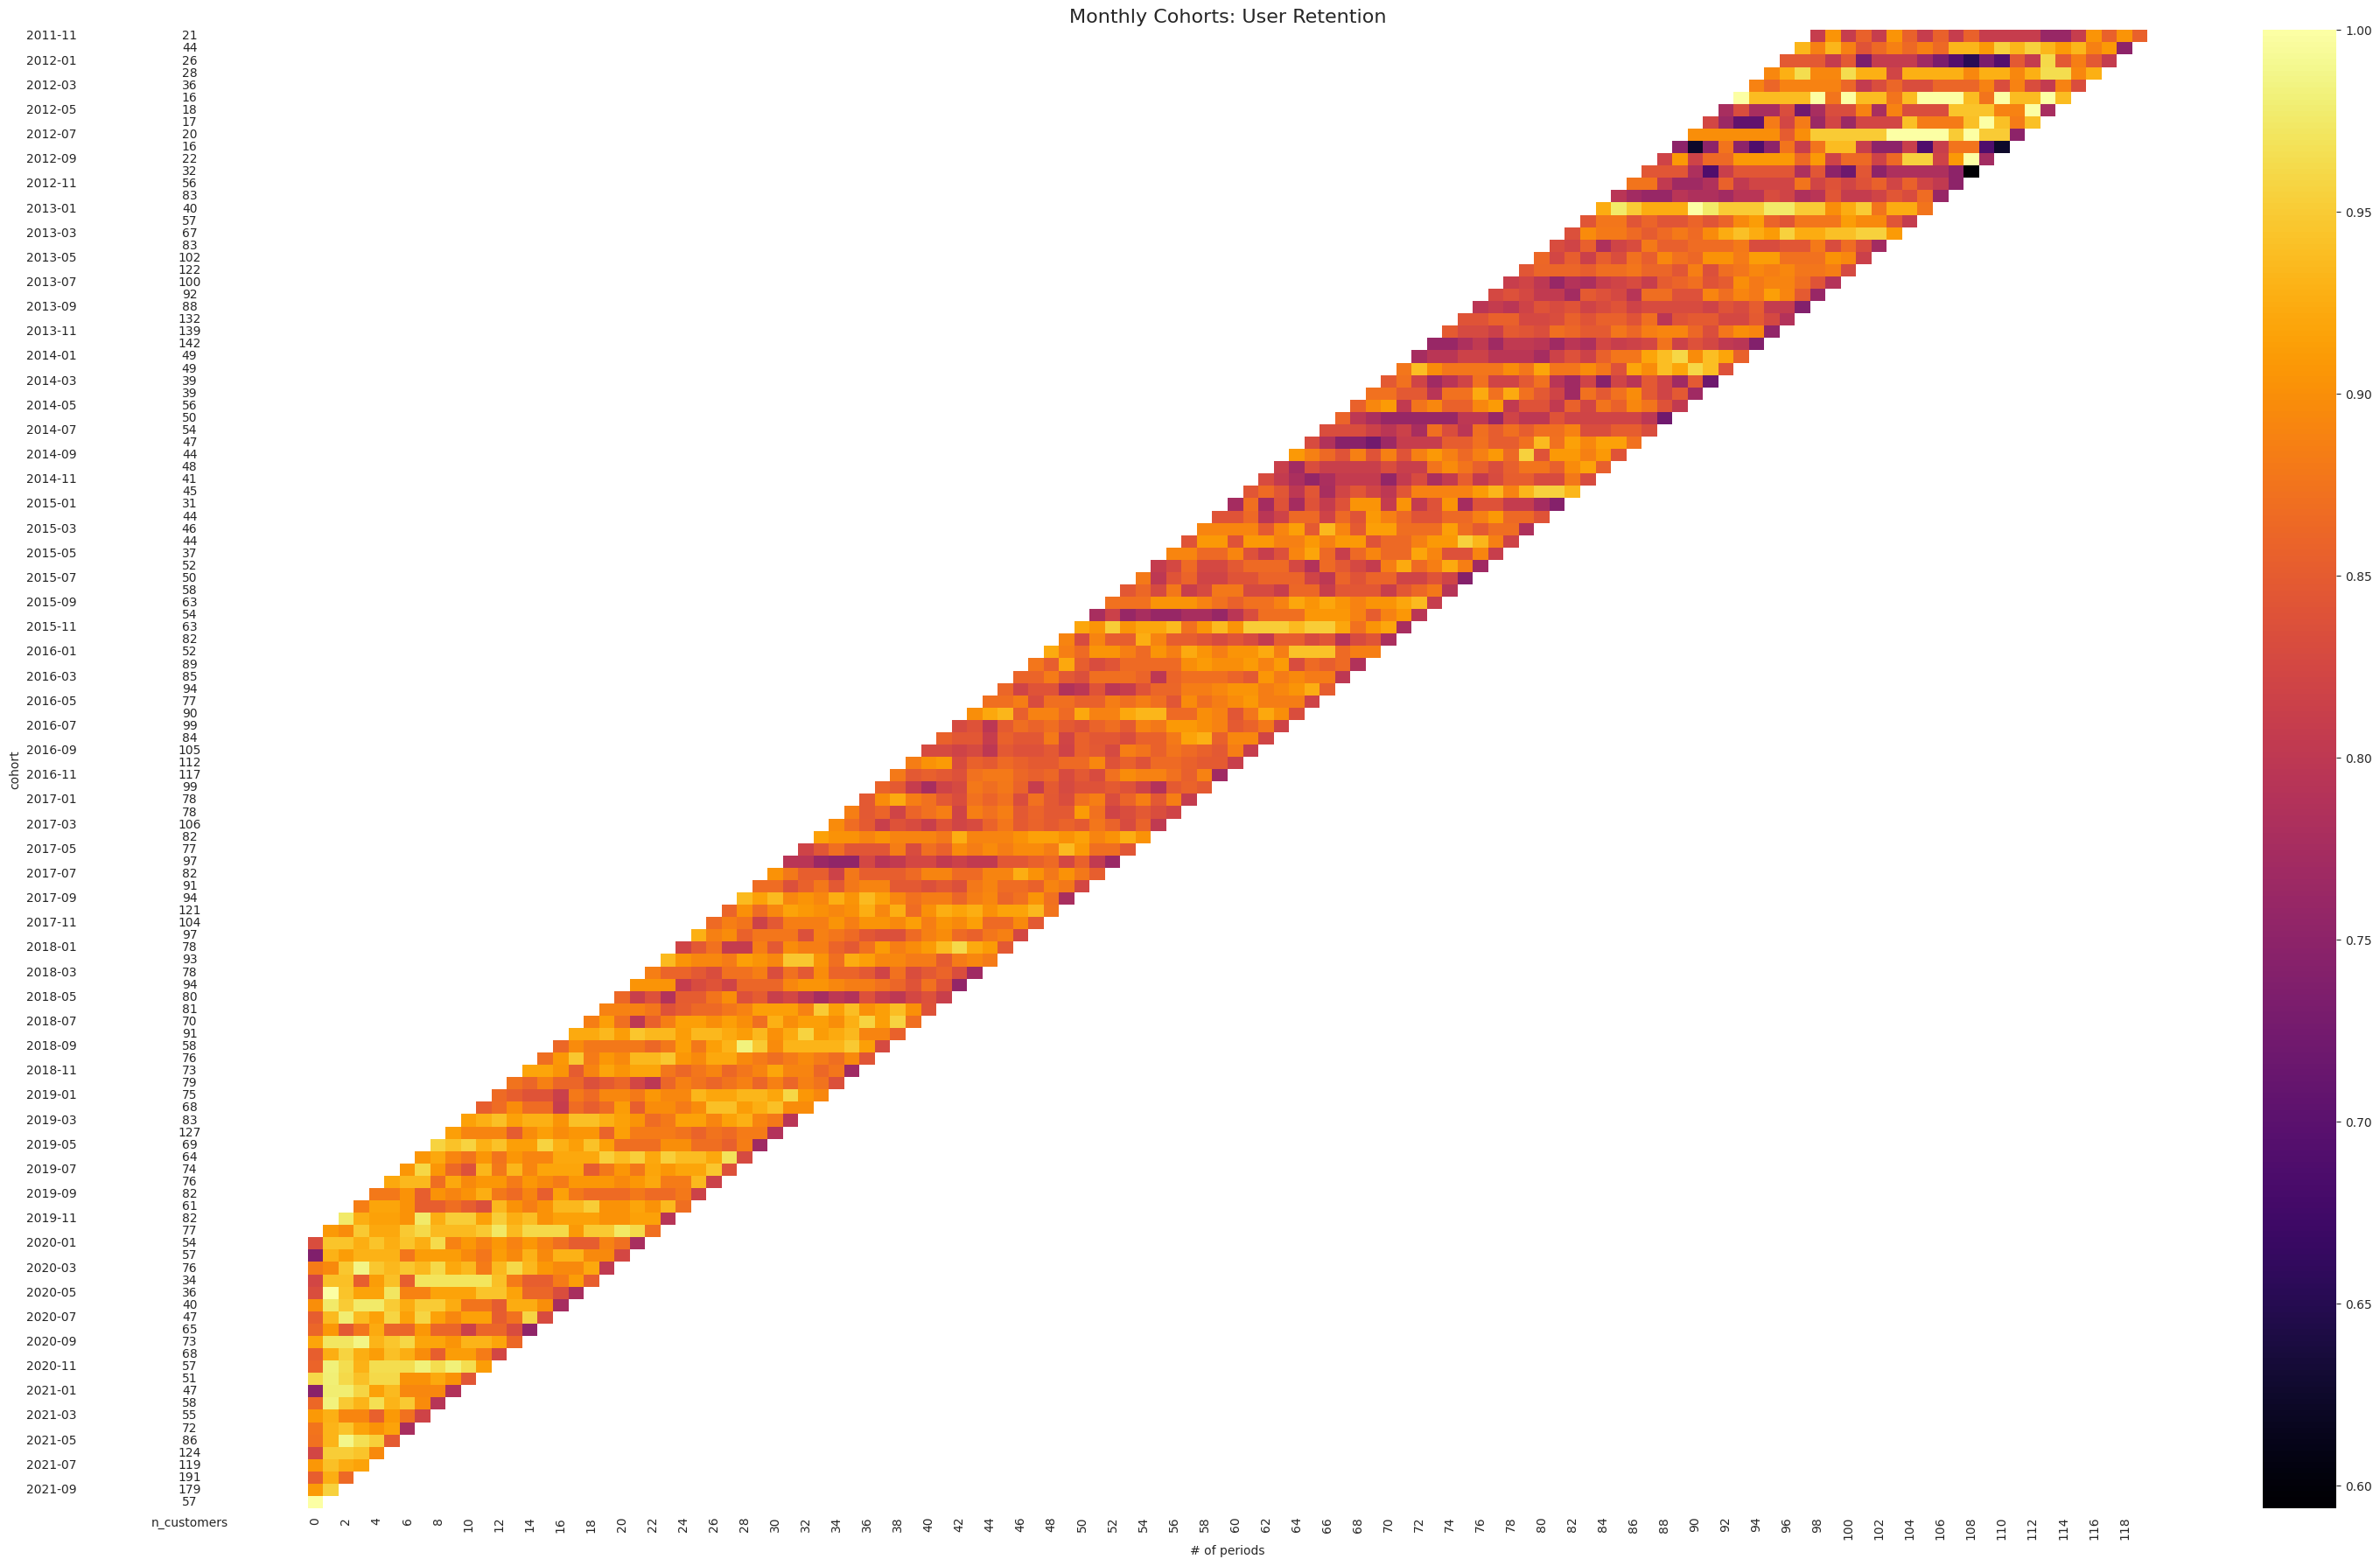

In [13]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(30, 18), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=False,
                fmt='.0%',
                cmap='inferno',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    cohort_size_df = pd.DataFrame(df_cohort_q['n_customers']).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()

#RFM_segmentation

In [14]:
def RClass(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.40]:
        return 4
    elif x <= d[p][0.60]:
        return 3
    elif x <= d[p][0.80]:
        return 2
    else:
        return 1

def FMClass(x,p,d):
    if x <= d[p][0.20]:
        return 1
    if x <= d[p][0.40]:
        return 2
    elif x <= d[p][0.60]:
        return 3
    elif x <= d[p][0.80]:
       return 4
    else:
        return 5

In [15]:
PRESENT = dt.datetime(year=2021, month=10, day=13, hour=12, minute=0, second=0)
rfm = data.copy()
rfm['tr_num'] = rfm['uid1'].astype(str) + rfm['mcc_id'].astype(str) + rfm['date_pur'].dt.strftime('%Y%m%d')

rfm= rfm.groupby('uid1').agg({'date_pur': lambda date: (PRESENT - date.max()).days,
                             'tr_num': lambda num: len(num),
                             'transaction_amt': lambda price: price.sum()})

rfm.columns = ['recency','frequency','monetary']
rfm['recency'] = rfm['recency'].astype(int)
rfm

,recency,frequency,monetary
uid1,,,
8388,2,138,129967.67
17264,6,272,149271.10
17373,15,316,910712.93
26297,1,364,180270.79
27044,3,622,973365.50
...,...,...,...
52794143,1,404,558464.13
52794735,1,1419,2764545.07
52801709,6,225,412075.57


In [16]:
quartiles = rfm.quantile(q=[0.2,0.4,0.6,0.8,1])
quartiles=quartiles.to_dict()

rfm['R_Quartile'] = rfm['recency'].apply(RClass, args=('recency',quartiles,))
rfm['F_Quartile'] = rfm['frequency'].apply(FMClass, args=('frequency',quartiles,))
rfm['M_Quartile'] = rfm['monetary'].apply(FMClass, args=('monetary',quartiles,))

rfm['RFMClass'] = rfm.R_Quartile.map(str) \
                            + rfm.F_Quartile.map(str) \
                            + rfm.M_Quartile.map(str)

rfm['Total Score'] = rfm['R_Quartile'] + rfm['F_Quartile'] +rfm['M_Quartile']

In [17]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm['segment'] = rfm['R_Quartile'].astype(str) + ((rfm['F_Quartile'] + rfm['M_Quartile'])/2).astype(int).astype(str)
rfm['segment'] = rfm['segment'].replace(seg_map, regex=True)
segments_counts = rfm['segment'].value_counts().sort_values(ascending=True)
rfm[["segment","recency","frequency","monetary"]].groupby("segment").agg(["mean","count"])


recency         frequency            monetary      
                          mean count        mean count          mean count
segment                                                                   
About to Sleep        2.482912   673  137.277860   673  1.032758e+05   673
At Risk              23.426698   839  413.423123   839  4.312646e+05   839
Can't Lose           16.074074    81  919.271605    81  1.199657e+06    81
Champions             1.000000  1907  813.050341  1907  9.783027e+05  1907
Hibernating          83.503529  2125   96.110588  2125  8.041739e+04  2125
Loyal Customers       2.354046   692  691.241329   692  8.242835e+05   692
Need Attention        2.408805   477  370.737945   477  3.132609e+05   477
New Customers         1.000000   391   56.378517   391  3.773417e+04   391
Potential Loyalists   1.000000  1344  316.466518  1344  2.388639e+05  1344

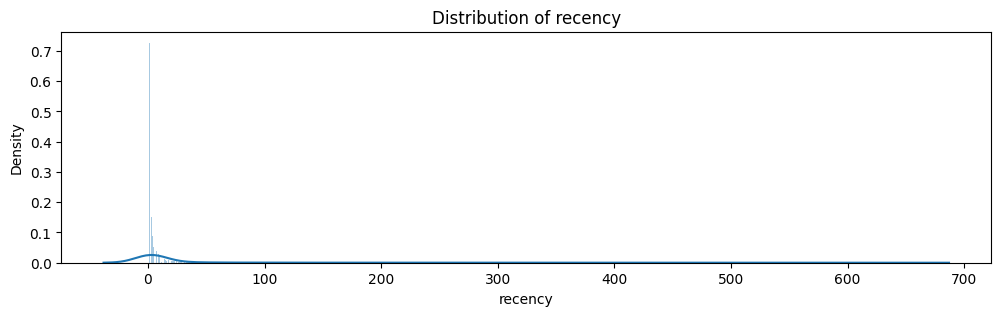

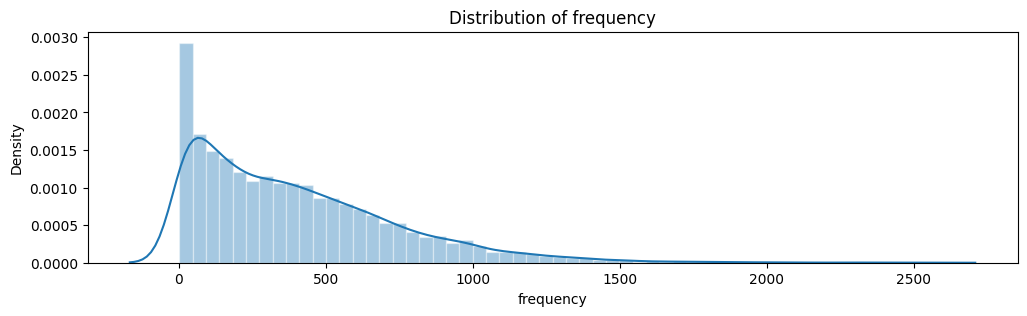

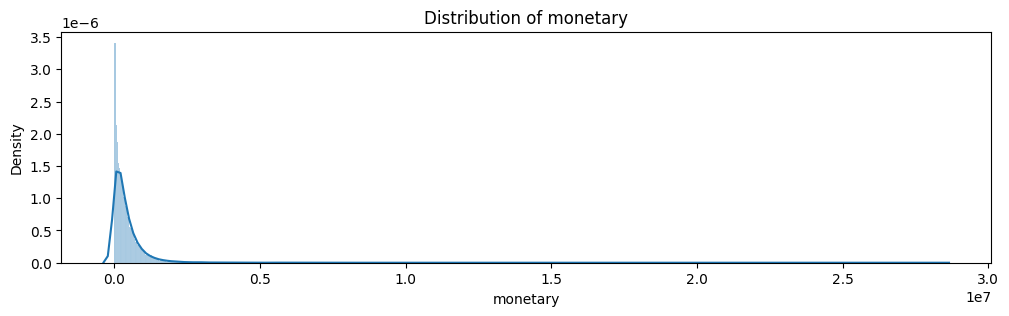

In [18]:
colnames = ['recency', 'frequency', 'monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.histplot(rfm[col], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4),)
    ax.set_title('Distribution of %s' % col)
    plt.show()

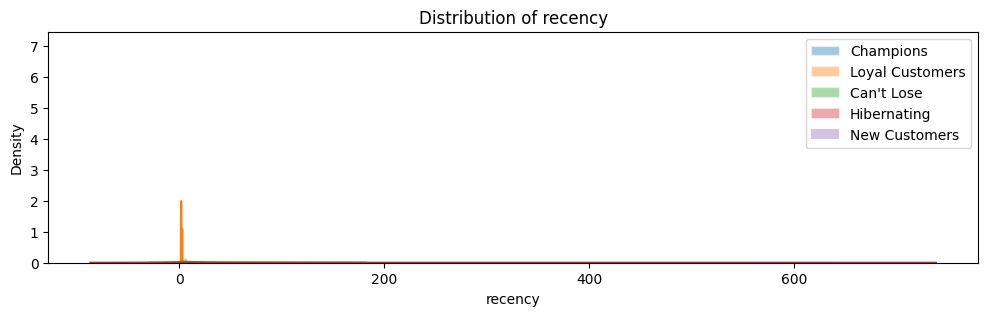

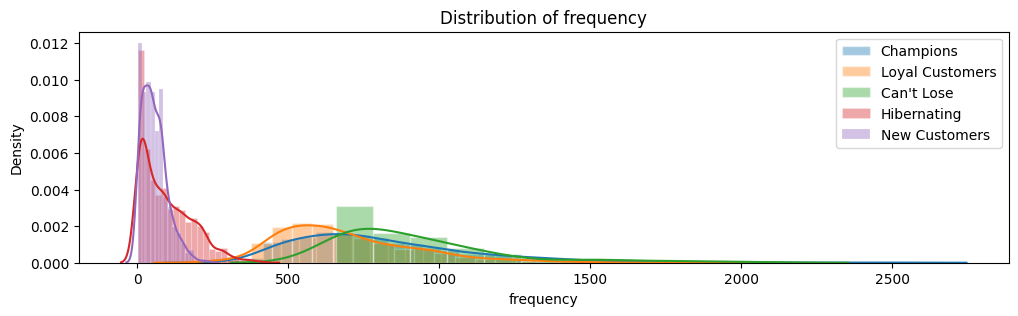

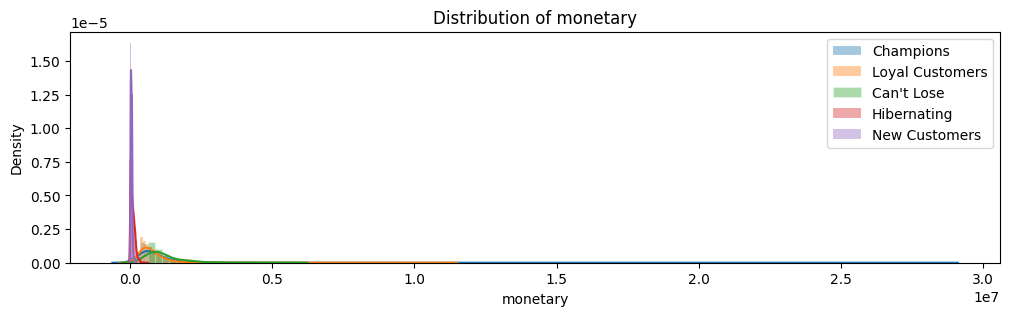

In [19]:
segments = ['Champions', 'Loyal Customers', "Can't Lose", "Hibernating", "New Customers"]

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    for segment in segments:
        sns.histplot(rfm[rfm['segment']==segment][col], label=segment, kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4),)
    ax.set_title('Distribution of %s' % col)
    plt.legend()
    plt.show()

In [20]:
agg_dict = {
    'recency': 'count',
    'frequency': 'mean',
    'monetary': 'sum'
}

df_analysis = rfm.groupby('segment').agg(agg_dict).sort_values(by='recency').reset_index()
df_analysis.rename({'segment': 'label', 'recency': 'count'}, axis=1, inplace=True)
df_analysis['count_share'] = df_analysis['count'] / df_analysis['count'].sum()
df_analysis['monetary_share'] = df_analysis['monetary'] / df_analysis['monetary'].sum()

df_analysis

,label,count,frequency,monetary,count_share,monetary_share
0,Can't Lose,81,919.271605,9.717224e+07,0.009497,0.026838
1,New Customers,391,56.378517,1.475406e+07,0.045844,0.004075
2,Need Attention,477,370.737945,1.494255e+08,0.055927,0.041271
3,About to Sleep,673,137.277860,6.950458e+07,0.078907,0.019197
4,Loyal Customers,692,691.241329,5.704042e+08,0.081135,0.157543
5,At Risk,839,413.423123,3.618310e+08,0.098370,0.099936
6,Potential Loyalists,1344,316.466518,3.210330e+08,0.157580,0.088668
7,Champions,1907,813.050341,1.865623e+09,0.223590,0.515275
8,Hibernating,2125,96.110588,1.708870e+08,0.249150,0.047198


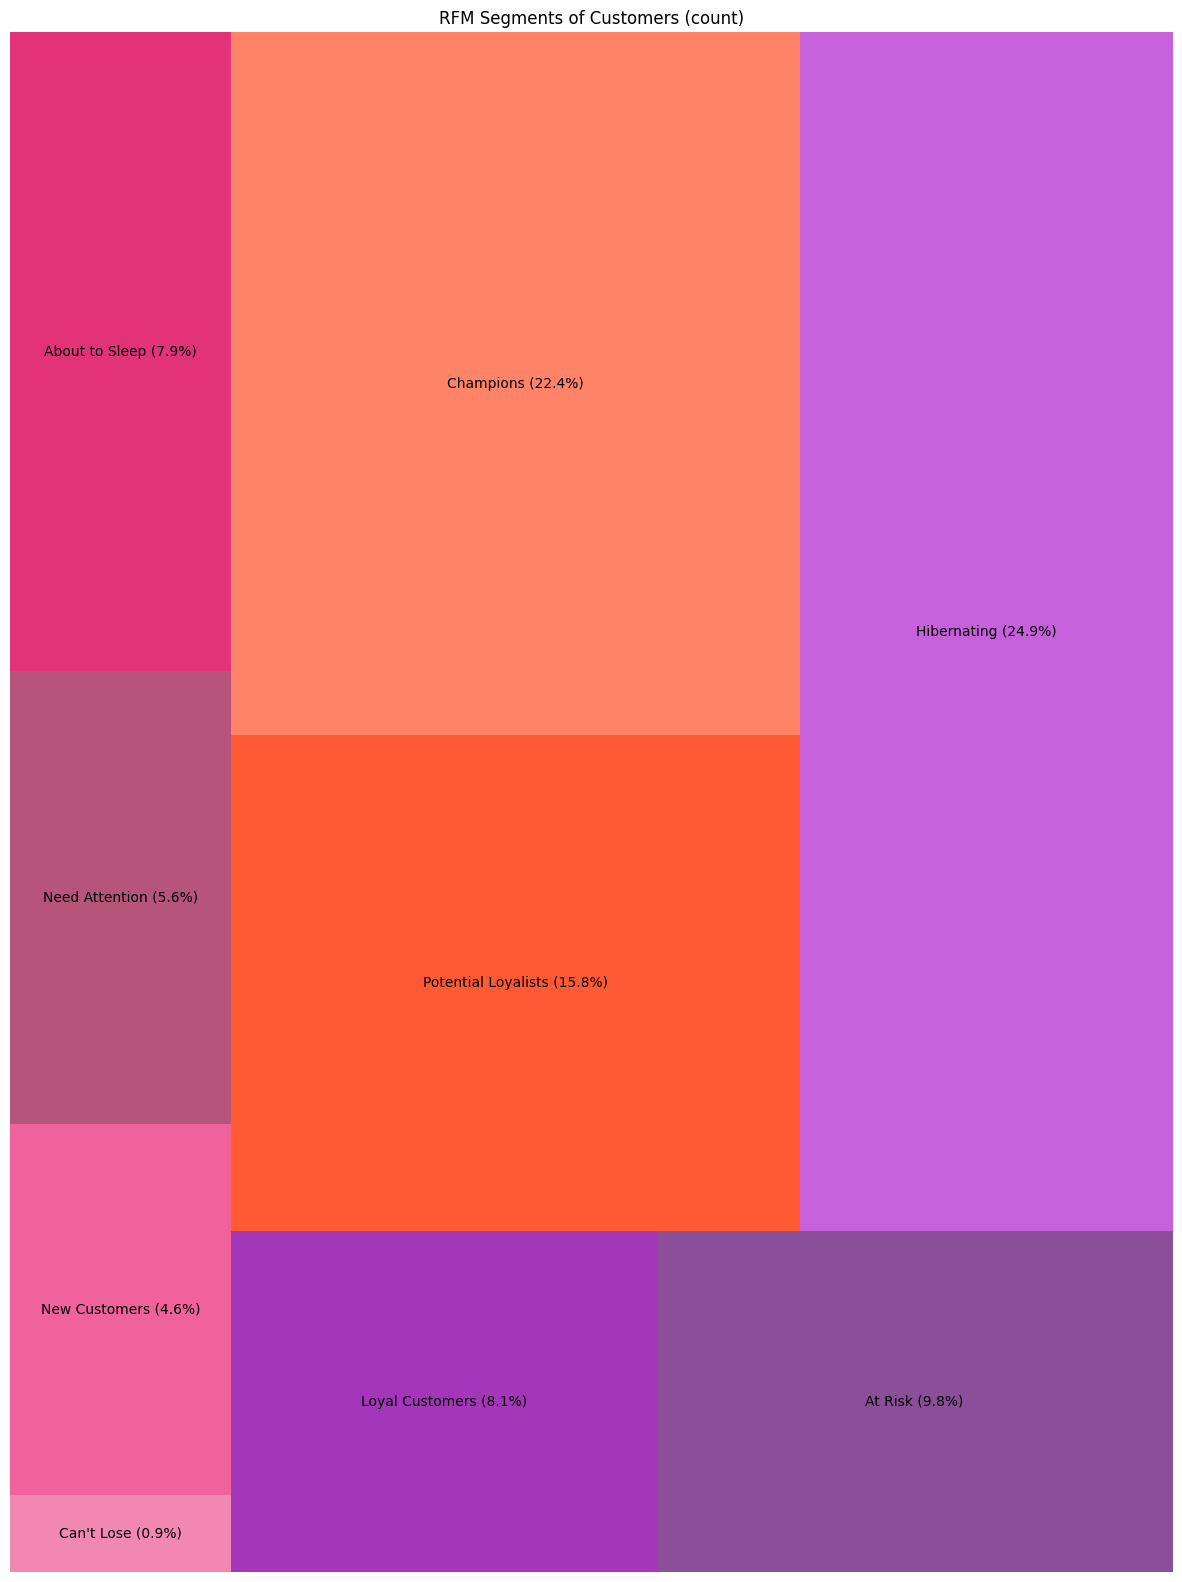

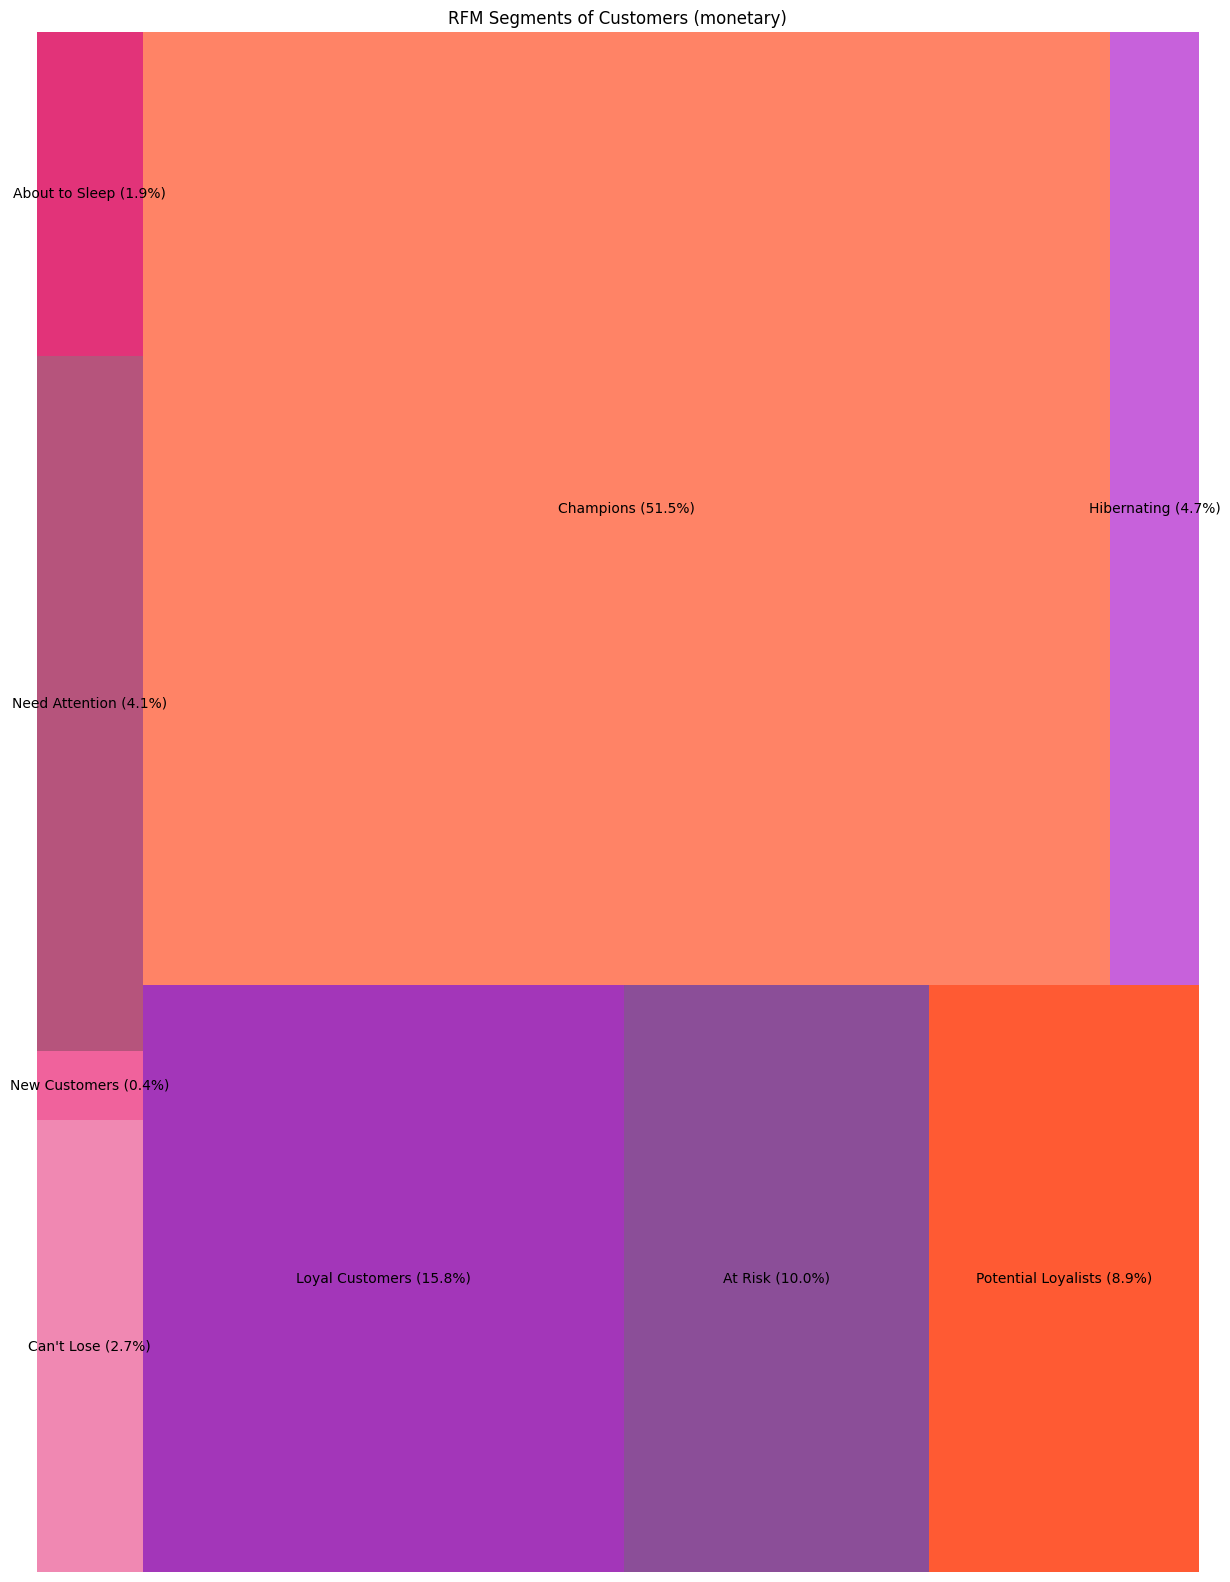

In [21]:
colors = ['#ED6B9F', '#ED3B83', '#A4295B', '#DB0058', '#8C04A8', '#6E227E', '#FF3100', '#FF6440', '#B939D3', '#A4E5E0', '#1848A0']

for col in ['count', 'monetary']:
    labels = df_analysis['label'] + df_analysis[col + '_share'].apply(lambda x: ' ({0:.1f}%)'.format(x*100))

    fig, ax = plt.subplots(figsize=(15,20))
    squarify.plot(sizes=df_analysis[col], label=labels, alpha=.8, color=colors)
    ax.set_title('RFM Segments of Customers (%s)' % col)
    plt.axis('off')
    plt.show()

#Cluster analysis

In [22]:
df_full = rfm.join(customer_df, on='uid1')
df_full['FM_Quartile'] = ((df_full['F_Quartile'] + df_full['M_Quartile'])/2).astype(int)
df_full

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score,segment,customer_age,country,city_of_living,registration_dt,website_last_visit_date,email,has_mob_app,phone_number,push,FM_Quartile
uid1,,,,,,,,,,,,,,,,,,,
8388,2,138,129967.67,3,2,2,322,7,About to Sleep,46.0,RUSSIA,Kazan,18.02.2017,01.05.2019,0.0,0.0,1.0,0.0,2
17264,6,272,149271.10,2,3,2,232,7,Hibernating,20.0,RUSSIA,Sevastopol,21.07.2020,03.10.2021,0.0,0.0,1.0,0.0,2
17373,15,316,910712.93,1,3,5,135,9,At Risk,31.0,RUSSIA,Kazan,26.02.2016,24.12.2018,0.0,1.0,1.0,0.0,4
26297,1,364,180270.79,5,3,2,532,10,Potential Loyalists,27.0,RUSSIA,Sevastopol,25.01.2018,16.04.2018,0.0,1.0,1.0,1.0,2
27044,3,622,973365.50,3,4,5,345,12,Loyal Customers,41.0,RUSSIA,Sevastopol,17.07.2015,30.07.2016,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52794143,1,404,558464.13,5,3,4,534,12,Potential Loyalists,35.0,RUSSIA,Volgograd,26.02.2012,27.04.2021,0.0,1.0,1.0,1.0,3
52794735,1,1419,2764545.07,5,5,5,555,15,Champions,42.0,RUSSIA,Omsk,04.06.2013,22.01.2021,1.0,1.0,1.0,1.0,5
52801709,6,225,412075.57,2,2,4,224,8,At Risk,57.0,RUSSIA,Omsk,17.08.2013,18.02.2016,0.0,0.0,1.0,0.0,3


In [23]:
df_segment = df_full[['FM_Quartile','R_Quartile', 'customer_age']]
scaler = StandardScaler()
scaler.fit(df_segment)
scaled_df = pd.DataFrame(scaler.transform(df_segment),columns= df_segment.columns)

scaled_df

,FM_Quartile,R_Quartile,customer_age
0,-0.601864,-0.194356,0.300679
1,-0.601864,-0.822735,-1.525781
2,0.862491,-1.451113,-0.753048
3,-0.601864,1.062401,-1.034042
4,0.862491,-0.194356,-0.050563
...,...,...,...
8524,0.130314,1.062401,-0.472054
8525,1.594669,1.062401,0.019685
8526,0.130314,-0.822735,1.073412
8527,0.862491,1.062401,-0.120812


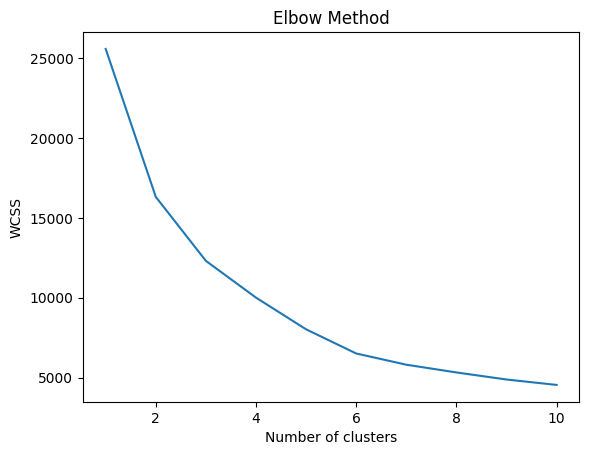

In [24]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_full['cluster'] = kmeans.fit_predict(scaled_df)

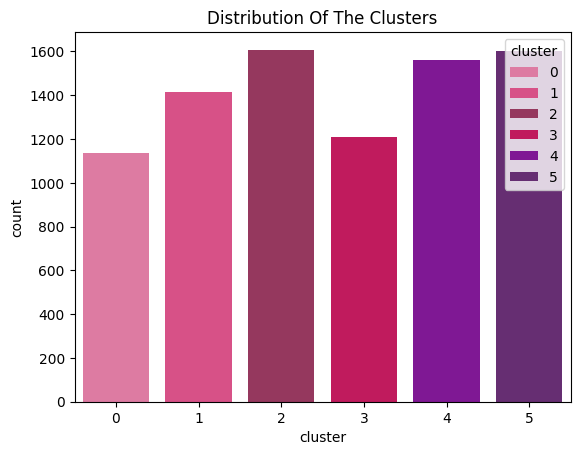

In [26]:
#pal = ['#ED6B9F', '#ED3B83', '#A4295B', '#DB0058', '#8C04A8', '#6E227E', '#FF3100', '#FF6440', '#B939D3']
pal = ['#ED6B9F', '#ED3B83', '#A4295B', '#DB0058', '#8C04A8', '#6E227E']
pl = sns.countplot(x=df_full['cluster'], palette=pal, hue = df_full['cluster'])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [27]:
df_full.groupby('cluster').agg({
    'recency' : ['mean','min','max'],
    'frequency' : ['mean','min','max'],
    'customer_age' : ['mean','min','max'],
    'monetary' : ['mean','min','max','count']
})

recency            frequency            customer_age              \
              mean min  max        mean  min   max         mean   min   max   
cluster                                                                       
0         1.000000   1    1  243.286344    1   651    31.773568  18.0  52.0   
1        60.391949   2  648  136.776836    1   641    58.507768  45.0  79.0   
2         1.000000   1    1  839.935945  298  2541    35.681592  18.0  55.0   
3         1.443709   1   10  427.120861    1  2389    59.981788  45.0  79.0   
4        11.759923   2  400  549.364277   93  2011    35.912932  18.0  60.0   
5        61.326250   2  642  110.310625    1   575    31.867500  18.0  45.0   

             monetary                                
                 mean        min          max count  
cluster                                              
0        1.774334e+05     149.00   1100970.10  1135  
1        1.281849e+05     112.00   5516623.58  1416  
2        1.013440e+06  228644.71  28284219.11  1608  
3        4.465741e+05     782.00  11533203.10  1208  
4        5.957201e+05  143110.30  10888557.30  1562  
5        8.634436e+04     114.00    576619.70  1600

In [28]:
df_full.groupby(['cluster','segment']).size()

cluster  segment            
0        New Customers           320
         Potential Loyalists     815
1        About to Sleep          272
         At Risk                 202
         Hibernating             942
2        Champions              1608
3        At Risk                  21
         Can't Lose                3
         Champions               299
         Loyal Customers         119
         Need Attention          166
         New Customers            71
         Potential Loyalists     529
4        At Risk                 600
         Can't Lose               78
         Loyal Customers         573
         Need Attention          311
5        About to Sleep          401
         At Risk                  16
         Hibernating            1183
dtype: int64

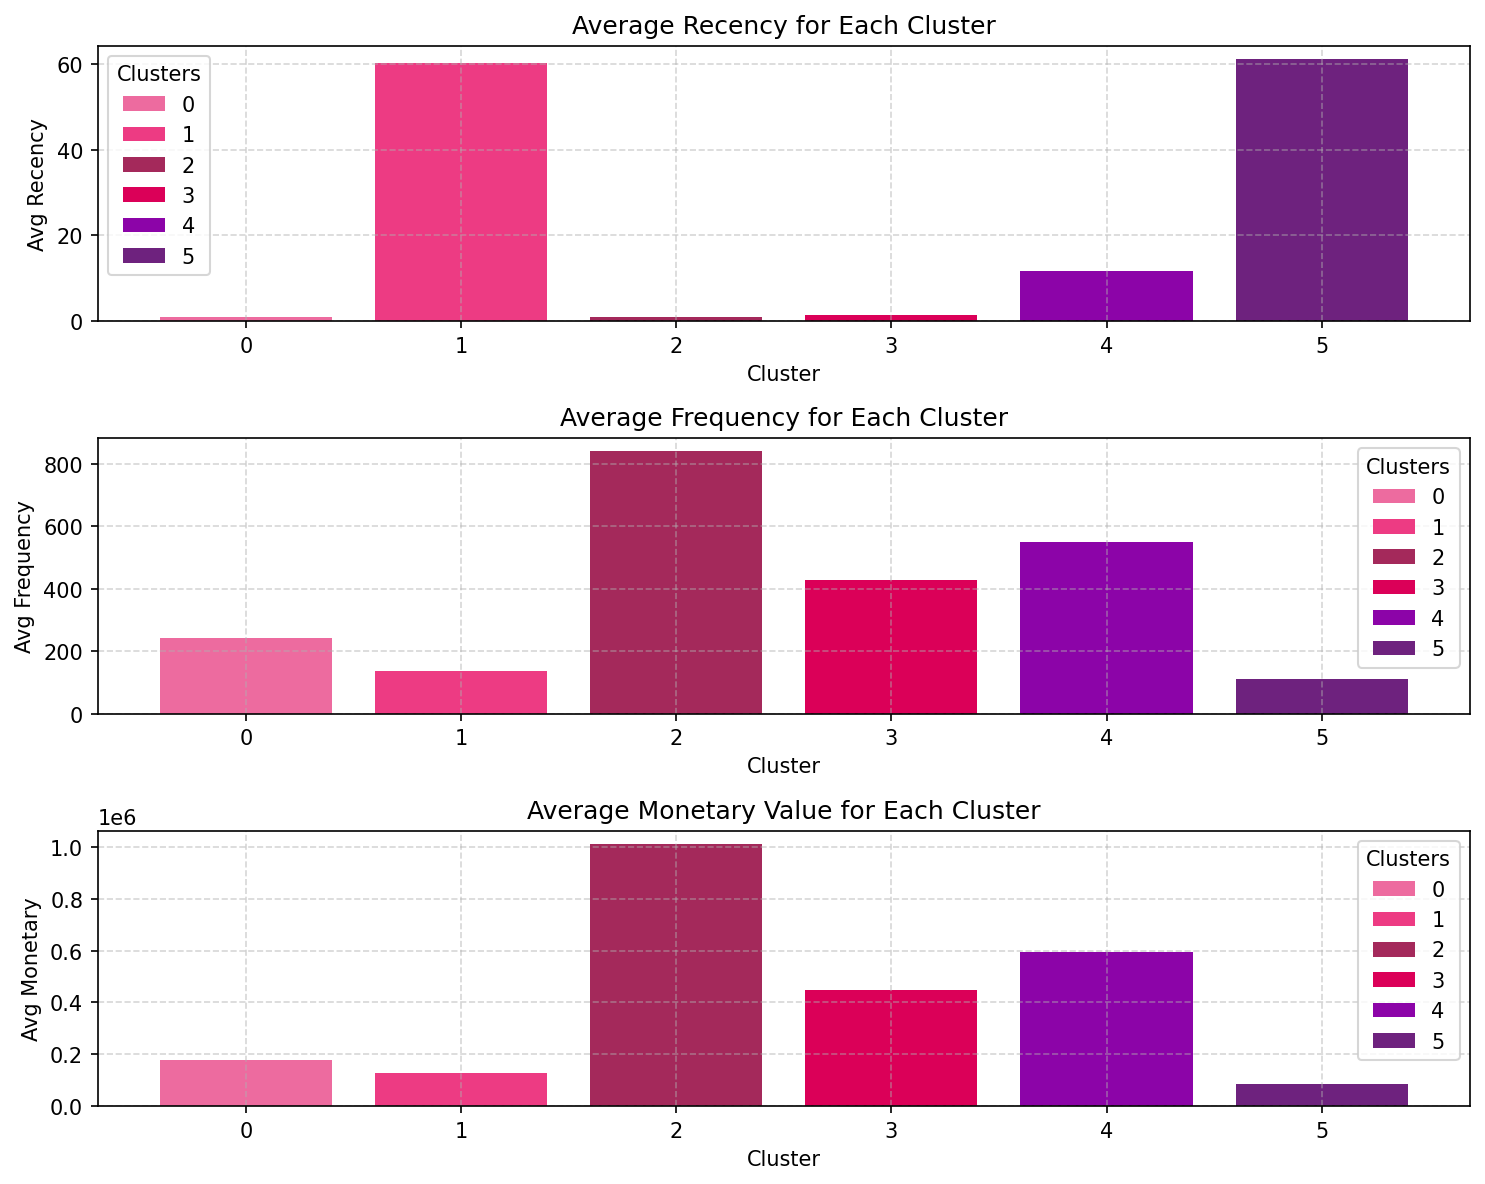

In [73]:
cluster_summary = df_full.groupby('cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
}).reset_index()


colors = ['#ED6B9F', '#ED3B83', '#A4295B', '#DB0058', '#8C04A8', '#6E227E']

# Plot the average RFM scores for each cluster
plt.figure(figsize=(10, 8),dpi=150)

# Plot Avg Recency
plt.subplot(3, 1, 1)
bars = plt.bar(cluster_summary.index, cluster_summary['recency'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Recency')
plt.title('Average Recency for Each Cluster')

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

# Plot Avg Frequency
plt.subplot(3, 1, 2)
bars = plt.bar(cluster_summary.index, cluster_summary['frequency'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Frequency')
plt.title('Average Frequency for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

# Plot Avg Monetary
plt.subplot(3, 1, 3)
bars = plt.bar(cluster_summary.index, cluster_summary['monetary'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Monetary')
plt.title('Average Monetary Value for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

plt.tight_layout()
plt.show()

#Hypothis

In [67]:
from scipy import stats
df_for_hyp = df_full

##Hypothis №1: difference between young and old customers using app

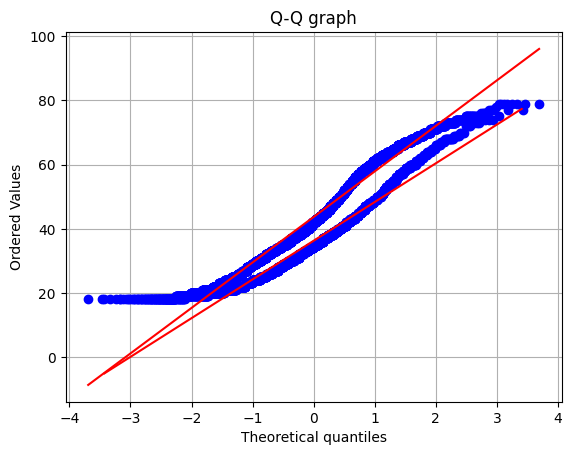

there is statistical difference between new and old customers using app


In [35]:
H0 = 'there is no statistical difference between young and old customers using app'
Ha = 'there is statistical difference between young and old customers using app'

has_mob_app = df_for_hyp[df_for_hyp['has_mob_app'] == 1]
no_mob_app = df_for_hyp[df_for_hyp['has_mob_app'] == 0]

stats.probplot(has_mob_app['customer_age'], dist="norm", plot=plt)
stats.probplot(no_mob_app['customer_age'], dist="norm", plot=plt)

plt.title('Q-Q graph')
plt.grid()
plt.show()

t_stat, p_value = stats.mannwhitneyu(has_mob_app['customer_age'], no_mob_app['customer_age'])

if p_value < 0.05:
    print(Ha)
else:
    print(H0)

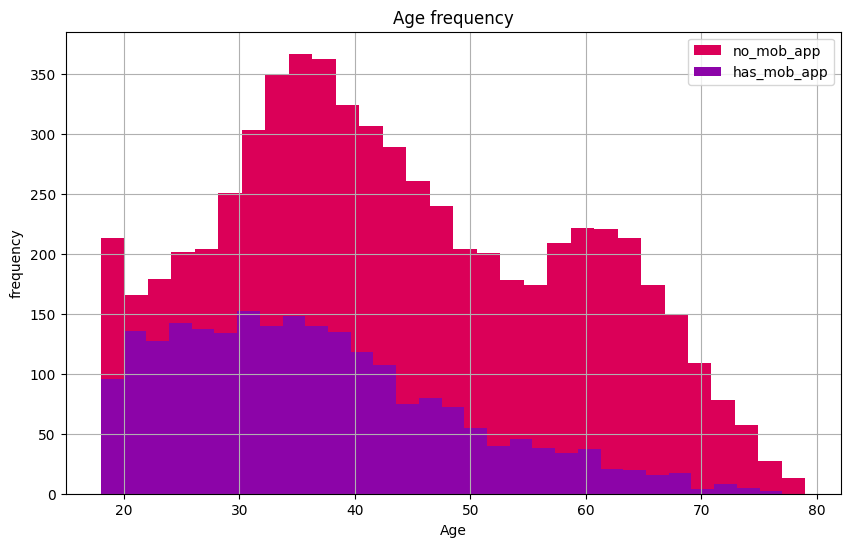

In [68]:
plt.figure(figsize=(10, 6))
plt.hist(no_mob_app['customer_age'], bins=30, alpha=1, color='#DB0058', label='no_mob_app')
plt.hist(has_mob_app['customer_age'], bins=30, alpha=1, color='#8C04A8', label='has_mob_app')


plt.legend()
plt.title('Age frequency')
plt.xlabel('Age')
plt.ylabel('frequency')

plt.grid(True)
plt.show()

##Hypothis №2: difference between frequency between people who uses app and who doesnt

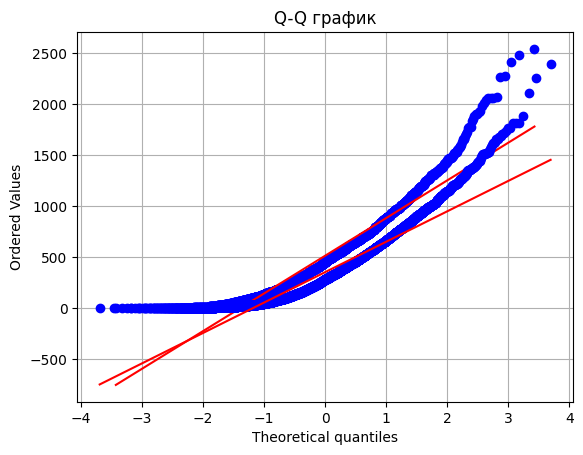

there is statistical difference between referncys between people who uses app and who doesnt


In [ ]:
H0 = 'there is no statistical difference between frequency between people who uses app and who doesnt'
Ha = 'there is statistical difference between frequency between people who uses app and who doesnt'

stats.probplot(has_mob_app['frequency'], dist="norm", plot=plt)
stats.probplot(no_mob_app['frequency'], dist="norm", plot=plt)
plt.title('Q-Q')
plt.grid()
plt.show()

t_stat, p_value = stats.mannwhitneyu(has_mob_app['frequency'], no_mob_app['frequency'])

if p_value < 0.05:
    print(Ha)
else:
    print(H0)

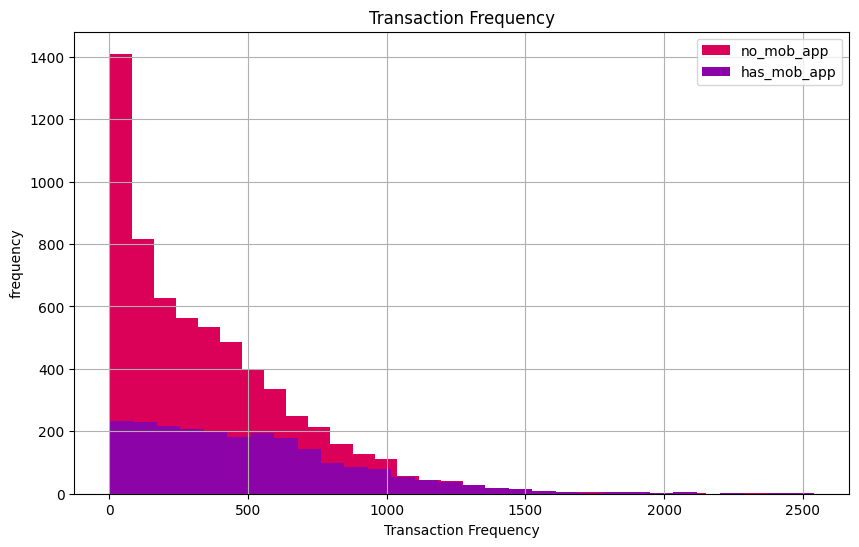

In [70]:
plt.figure(figsize=(10, 6))
plt.hist(no_mob_app['frequency'], bins=30, alpha=1, color='#DB0058', label='no_mob_app')
plt.hist(has_mob_app['frequency'], bins=30, alpha=1, color='#8C04A8', label='has_mob_app')
plt.legend()
plt.title('Transaction Frequency')
plt.xlabel('Transaction Frequency')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

##Hypothis №3: difference difference between top 20 products between old and young customers

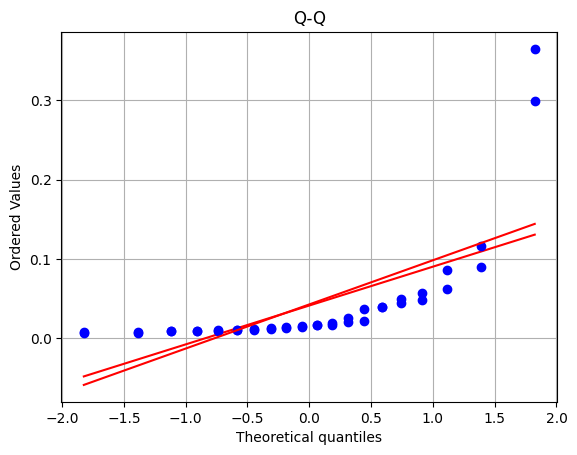

there is no statistical difference between top 20 products between old and young customers


In [65]:
H0 = 'there is no statistical difference between top 20 products between old and young customers'
Ha = 'there is statistical difference between top 20 products between old and young customers'

data_with_product = transactional_df.join(df_for_hyp, on='uid1').dropna()
data_with_product['age_segment'] = data_with_product['customer_age'].apply(lambda x: 'Young customers' if x < 45 else 'Old customers')
data_with_product_by_segment = data_with_product.groupby(['age_segment', 'mcc_id']).size().reset_index(name='quantity')
total_counts = data_with_product_by_segment.groupby('age_segment')['quantity'].transform('sum')
data_with_product_by_segment['proportion'] = data_with_product_by_segment['quantity'] / total_counts

top_20_mcc = data_with_product_by_segment.sort_values(['age_segment', 'proportion'], ascending=[True, False])\
                            .groupby('age_segment')\
                            .head(20)

stats.probplot(top_20_mcc[top_20_mcc['age_segment'] == 'Young customers']['proportion'], dist="norm", plot=plt)
stats.probplot(top_20_mcc[top_20_mcc['age_segment'] == 'Old customers']['proportion'], dist="norm", plot=plt)
plt.title('Q-Q')
plt.grid()
plt.show()

t_stat, p_value = stats.mannwhitneyu(top_20_mcc[top_20_mcc['age_segment'] == 'Young customers']['proportion'], top_20_mcc[top_20_mcc['age_segment'] == 'Old customers']['proportion'])

if p_value < 0.05:
    print(Ha)
else:
    print(H0)

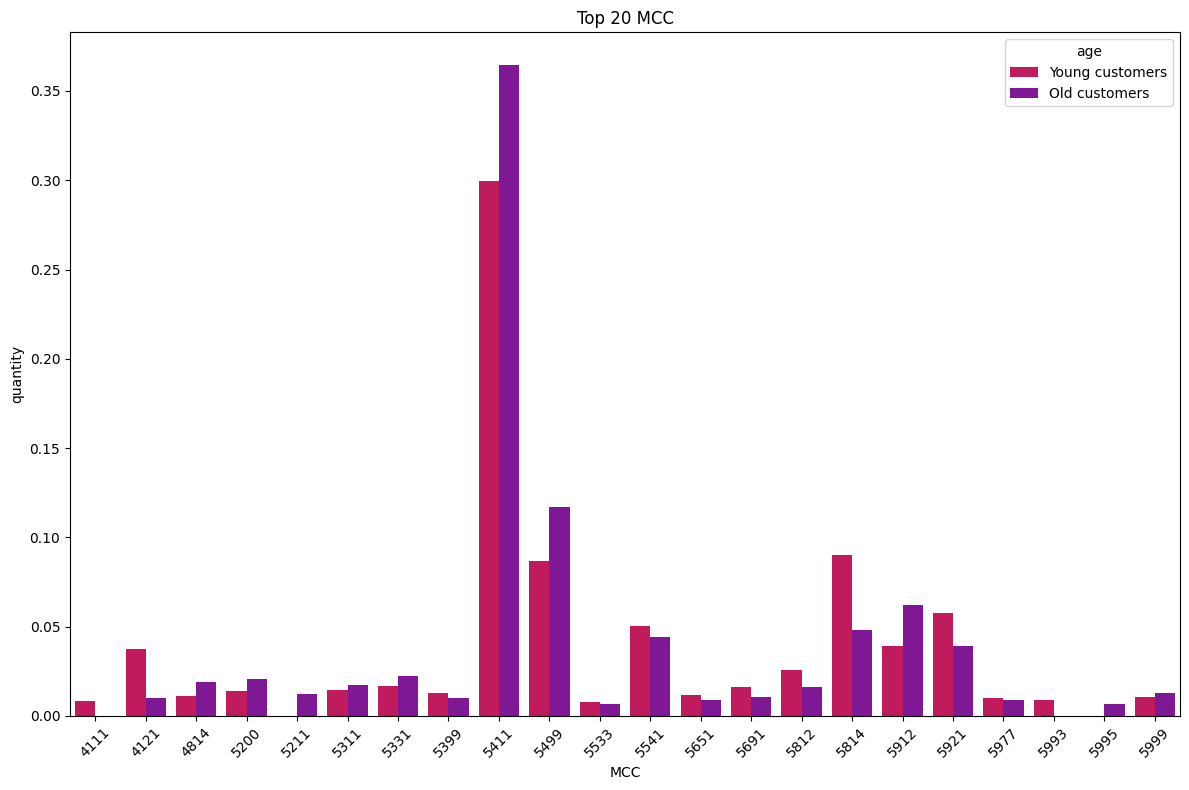

In [72]:
pal = ['#DB0058', '#8C04A8']

plt.figure(figsize=(12, 8))
sns.barplot(data=top_20_mcc, x='mcc_id', y='proportion',palette = pal, hue='age_segment')
plt.title('Top 20 MCC')
plt.xlabel('MCC')
plt.ylabel('quantity')
plt.xticks(rotation=45)
plt.legend(title='age')
plt.tight_layout()
plt.show()